- Open **Google AI for Developer** , and Understand every concept that tells how to use gemini API in your application
- The Gemini API lets you access the latest generative models from Google. This API reference provides detailed information for the classes and methods available in the Gemini API SDKs. Pick a language and follow the setup steps to get started with building generative applications on your platform of choice.
- The Python SDK for the Gemini API is contained in the google-generativeai package. Install the dependency using **pip install -q -U google-generativeai**

- Google Provides free tier for usage of genai model........
- **Price(input) and Price (output)**: Free of charge.....but there is a limitation ie;For gemin 1.5 flash ,, **total input token count is 1,048,576 and output tokens count is 8192** , for gemin 1.5 pro model total **input tokens count is 2,097,152 , output token count is 8192** , for gemini 1.0 pro **total ip token count is 30,720 , op token count is 2048**
- if ypu exceed this then,, your free tier for this account is completed,,now you have to pay-as-you-go
- **Trick:** Create another gmail account and from that generate APi and use it,,,,,,,,,,,BUt when you developing industry level application,then you have to use paid-services,,
- **SO,I am going to use gemini 1.0 pro for learning purpose,and for project purpose i will use 1.5 pro or flash**

In [1]:
import google.generativeai as genai #For accessing Gemini API or google genai model's
import pathlib
import textwrap        #for text refining  or display output in precise manner             
from IPython.display import display #for text refining  
from IPython.display import Markdown #for text refining  

## 1) Setting GEMINI_API_KEY in system environmental variable and Accessing To connect with Google's GenAI model's

- see this video https://www.youtube.com/watch?v=hgXJia5WxtY&t=180s for storing API key in system environmental varibale
- see this video to store API key in .env file https://www.youtube.com/watch?v=qgT-quk3JEo
- **NOTE**: After setting the API key in .env file OR in system env ,,you have to restart the jupyter kernel ie; you have to close it and restart it otherwise ,,os will not fetch this variable,,,,,in VS code there is no such a problem

In [2]:
import os
google_gemini_api_key = os.getenv("GEMINI_API_KEY")
#print(google_gemini_api_key)  -> gives u "None" means,,environmental variable not fetched by os,,so restart the kernel

In [3]:
genai.configure(api_key = google_gemini_api_key)

## 2) Response formatting technique

In [4]:
#windows + semicolon to open emoji and special symbol keypad
def to_markdown(text):
    text = text.replace("•","  *")
    return Markdown(textwrap.indent(text,'> ', predicate = lambda _:True))

#Bcz Gemini returns response containing bullet points,,so to convert it to star,,we defined this func
#bcz models repsonse contains,,\n , bullet poits..etc psecial symbol,,so to manage it

In [5]:
input_text = "This is a • sample text with bullet points."
result = to_markdown(input_text)
display(result)

> This is a   * sample text with bullet points.

## 3) Checking googles GenAI model's

In [17]:
for model in genai.list_models():
    print(model)
#These are the model we can access in free tier,and tokens limit in free tier for each model is given

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [24]:
model_list = list(genai.list_models())
model_list

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
      

In [25]:
pd.DataFrame(model_list)


,name,base_model_id,version,display_name,description,input_token_limit,output_token_limit,supported_generation_methods,temperature,max_temperature,top_p,top_k
0,models/chat-bison-001,,001,PaLM 2 Chat (Legacy),A legacy text-only model optimized for chat co...,4096,1024,"[generateMessage, countMessageTokens]",0.25,NaN,0.95,40.0
1,models/text-bison-001,,001,PaLM 2 (Legacy),A legacy model that understands text and gener...,8196,1024,"[generateText, countTextTokens, createTunedTex...",0.70,NaN,0.95,40.0
2,models/embedding-gecko-001,,001,Embedding Gecko,Obtain a distributed representation of a text.,1024,1,"[embedText, countTextTokens]",NaN,NaN,NaN,NaN
3,models/gemini-1.0-pro-latest,,001,Gemini 1.0 Pro Latest,The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens]",0.90,NaN,1.00,NaN
4,models/gemini-1.0-pro,,001,Gemini 1.0 Pro,The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens]",0.90,NaN,1.00,NaN
5,models/gemini-pro,,001,Gemini 1.0 Pro,The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens]",0.90,NaN,1.00,NaN
6,models/gemini-1.0-pro-001,,001,Gemini 1.0 Pro 001 (Tuning),The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens, createTunedModel]",0.90,NaN,1.00,NaN
7,models/gemini-1.0-pro-vision-latest,,001,Gemini 1.0 Pro Vision,The best image understanding model to handle a...,12288,4096,"[generateContent, countTokens]",0.40,NaN,1.00,32.0
8,models/gemini-pro-vision,,001,Gemini 1.0 Pro Vision,The best image understanding model to handle a...,12288,4096,"[generateContent, countTokens]",0.40,NaN,1.00,32.0
9,models/gemini-1.5-pro-latest,,001,Gemini 1.5 Pro Latest,Mid-size multimodal model that supports up to ...,2097152,8192,"[generateContent, countTokens]",1.00,2.0,0.95,64.0


#### Legacy models are no longer accessible..

In [26]:
for model in genai.list_models():
    if "generateContent" in model.supported_generation_methods:
        print(model.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash


In [27]:
accessible_model = list()
for model in genai.list_models():
    if "generateContent" in model.supported_generation_methods:
        accessible_model.append(model)
pd.DataFrame(accessible_model)

,name,base_model_id,version,display_name,description,input_token_limit,output_token_limit,supported_generation_methods,temperature,max_temperature,top_p,top_k
0,models/gemini-1.0-pro-latest,,001,Gemini 1.0 Pro Latest,The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens]",0.9,NaN,1.00,NaN
1,models/gemini-1.0-pro,,001,Gemini 1.0 Pro,The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens]",0.9,NaN,1.00,NaN
2,models/gemini-pro,,001,Gemini 1.0 Pro,The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens]",0.9,NaN,1.00,NaN
3,models/gemini-1.0-pro-001,,001,Gemini 1.0 Pro 001 (Tuning),The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens, createTunedModel]",0.9,NaN,1.00,NaN
4,models/gemini-1.0-pro-vision-latest,,001,Gemini 1.0 Pro Vision,The best image understanding model to handle a...,12288,4096,"[generateContent, countTokens]",0.4,NaN,1.00,32.0
5,models/gemini-pro-vision,,001,Gemini 1.0 Pro Vision,The best image understanding model to handle a...,12288,4096,"[generateContent, countTokens]",0.4,NaN,1.00,32.0
6,models/gemini-1.5-pro-latest,,001,Gemini 1.5 Pro Latest,Mid-size multimodal model that supports up to ...,2097152,8192,"[generateContent, countTokens]",1.0,2.0,0.95,64.0
7,models/gemini-1.5-pro-001,,001,Gemini 1.5 Pro 001,Mid-size multimodal model that supports up to ...,2097152,8192,"[generateContent, countTokens, createCachedCon...",1.0,2.0,0.95,64.0
8,models/gemini-1.5-pro,,001,Gemini 1.5 Pro,Mid-size multimodal model that supports up to ...,2097152,8192,"[generateContent, countTokens]",1.0,2.0,0.95,64.0
9,models/gemini-1.5-flash-latest,,001,Gemini 1.5 Flash Latest,Fast and versatile multimodal model for scalin...,1048576,8192,"[generateContent, countTokens]",1.0,2.0,0.95,64.0


#### Above 11 models are accessible

## 4) Text-2-Text Generation Demo

In [6]:
#Choosing Model
model = genai.GenerativeModel("gemini-pro")

In [29]:
%%time
response = model.generate_content("What is meaning of life?")

CPU times: total: 46.9 ms
Wall time: 8.08 s


In [32]:
response
# "usage_metadata": {
#   "prompt_token_count": 7,   -> in openai tokenizer if u paste input/prompt then u get 6 tokens 24 characters....in google tokenizer it is 7
#   "candidates_token_count": 376, -> in openai 395 tokens,,,,,,,,,,in google tokenizer it is 376
#   "total_token_count": 383
# }
#ie: each tokenizer model works differently,,,,,,,,,,,,,,,,openai tokenizer works differently,googles tokenizer/embedding works differently
#tokenizer means -> breaking down textinto tokens
#embeddings means -> converting each token of text is converted  to vector,,,and finally aggregating these vectors to single vector.
#ie;if text has 5 words in it thus we get 5 vectors and finally aggregating these 5 vectors to get single vector which represent this text..aggregating means(average of 5 vectors or sum of 5 vectors...etc)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The meaning of life is a deeply personal and subjective question that has been pondered by philosophers, theologians, and scientists for centuries. There is no one definitive answer, but rather a wide range of perspectives on what constitutes a meaningful life. Some common themes that emerge include:\n\n**Purpose and Fulfillment:** Many people find meaning in pursuing activities that align with their values and passions. This may involve making a contribution to society, creating something meaningful, or experiencing personal growth and fulfillment.\n\n**Relationships and Connections:** Strong social connections with family, friends, and loved ones can provide a sense of purpose and belonging. Building meaningful relationships can contribute to an overall fe

- **check metric for tokens usage**
- https://console.cloud.google.com/apis/api/generativelanguage.googleapis.com/metrics?project=gen-lang-client-0034393728 

In [35]:
response.text

'The meaning of life is a deeply personal and subjective question that has been pondered by philosophers, theologians, and scientists for centuries. There is no one definitive answer, but rather a wide range of perspectives on what constitutes a meaningful life. Some common themes that emerge include:\n\n**Purpose and Fulfillment:** Many people find meaning in pursuing activities that align with their values and passions. This may involve making a contribution to society, creating something meaningful, or experiencing personal growth and fulfillment.\n\n**Relationships and Connections:** Strong social connections with family, friends, and loved ones can provide a sense of purpose and belonging. Building meaningful relationships can contribute to an overall feeling of well-being and satisfaction.\n\n**Personal Growth and Development:** Engaging in self-reflection and seeking opportunities for learning and growth can help individuals discover their potential and live a more fulfilling li

In [36]:
to_markdown(response.text)
#formatting response

> The meaning of life is a deeply personal and subjective question that has been pondered by philosophers, theologians, and scientists for centuries. There is no one definitive answer, but rather a wide range of perspectives on what constitutes a meaningful life. Some common themes that emerge include:
> 
> **Purpose and Fulfillment:** Many people find meaning in pursuing activities that align with their values and passions. This may involve making a contribution to society, creating something meaningful, or experiencing personal growth and fulfillment.
> 
> **Relationships and Connections:** Strong social connections with family, friends, and loved ones can provide a sense of purpose and belonging. Building meaningful relationships can contribute to an overall feeling of well-being and satisfaction.
> 
> **Personal Growth and Development:** Engaging in self-reflection and seeking opportunities for learning and growth can help individuals discover their potential and live a more fulfilling life. Personal development may involve setting goals, overcoming challenges, and embracing new experiences.
> 
> **Contribution to Society:** Some people find meaning in contributing to the well-being of others or making a positive impact on their community or the world at large. This may involve volunteering, participating in social or political movements, or simply showing kindness and compassion to those around them.
> 
> **Experiencing the Present Moment:** Mindfulness and the ability to appreciate the present moment can bring a sense of tranquility and gratitude. Paying attention to the small things and savoring experiences can help individuals appreciate the beauty and meaning in everyday life.
> 
> **Spiritual or Religious Beliefs:** For some, religion or spirituality provides a framework for understanding the meaning of life and the purpose of their existence. Religious teachings and practices can offer guidance, comfort, and a sense of connection to a higher power.
> 
> Ultimately, the meaning of life is unique to each individual and can evolve over time. It is a personal journey of exploration, self-discovery, and the pursuit of what brings fulfillment and purpose.

In [37]:
response.candidates
#if u mentioned give me multiple possible answer,,then model will return you multiple answer,,and at the top,,best answer is present

[index: 0
content {
  parts {
    text: "The meaning of life is a deeply personal and subjective question that has been pondered by philosophers, theologians, and scientists for centuries. There is no one definitive answer, but rather a wide range of perspectives on what constitutes a meaningful life. Some common themes that emerge include:\n\n**Purpose and Fulfillment:** Many people find meaning in pursuing activities that align with their values and passions. This may involve making a contribution to society, creating something meaningful, or experiencing personal growth and fulfillment.\n\n**Relationships and Connections:** Strong social connections with family, friends, and loved ones can provide a sense of purpose and belonging. Building meaningful relationships can contribute to an overall feeling of well-being and satisfaction.\n\n**Personal Growth and Development:** Engaging in self-reflection and seeking opportunities for learning and growth can help individuals discover their

- One thing,,you know,,when you give prompt to chatgpt , gemini,,then it will not produce answer at one go,,,,instead it will produce line by , left to right , top to bottom manner,,and this is called streaming of answer

In [43]:
%%time
response = model.generate_content("What is meaning of life?" , stream=True)
response

CPU times: total: 15.6 ms
Wall time: 2.54 s


response:
GenerateContentResponse(
    done=False,
    iterator=<_StreamingResponseIterator>,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The meaning of life is a deep philosophical question that has been pondered by humans for"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLI

In [46]:
for i , chunk in enumerate(response):
    print(i,chunk.text)
    print("__"*60)

#1st ,, 0th text is generated,,then 1th , then 2th...like this,,one by one

0 The meaning of life is a deep philosophical question that has been pondered by humans for
________________________________________________________________________________________________________________________
1  centuries. There is no one definitive answer, as the meaning of life is a personal and subjective experience that varies from individual to individual. However, some common themes
________________________________________________________________________________________________________________________
2  that emerge when people contemplate the meaning of life include:

* **Purpose:** Feeling a sense of purpose and direction in life can give us a sense of meaning. This could come from our work, hobbies, relationships, or any other activity that we find fulfilling.
* **Values:** Our values define what is important
________________________________________________________________________________________________________________________
3  to us and help us to make choices about ho

## 5) Image-2-Text Generation Task

In [75]:
from PIL import Image

In [85]:
ip_img = IPImage(filename="image.jpeg")
#Using the IPython.display.Image object, ip_img, you are preparing the image in a format that should be compatible with the generate_content 
#method from the Google Generative AI library.
#Making jpeg compatible with generate_content

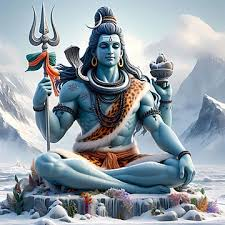

In [86]:
ip_img

In [87]:
print(type(ip_img))

<class 'IPython.core.display.Image'>


In [79]:
model2 = genai.GenerativeModel("gemini-1.5-flash")
#pro-vision is legacy or depricated,,so use flash

In [80]:
response = model2.generate_content(ip_img)

In [81]:
to_markdown(response.text)

> This is a depiction of Shiva, a major deity in Hinduism. He is often associated with destruction and transformation, but also with yogic practices and the cycle of life and death. 
> 
> Here are some key elements of this image:
> 
> * **The Trishula:** The three-pronged spear is Shiva's primary weapon and symbol of his power to destroy illusions and negativity. 
> * **The Damaru:** The small drum held in Shiva's left hand represents the rhythm of creation and the sounds of the cosmos. 
> * **The Snake:** The cobra wrapped around Shiva's neck, symbolizes his control over the destructive forces of nature and the cycles of life and death.
> * **The Ascetic Appearance:** Shiva's ash-smeared body and matted hair represent his detachment from worldly desires and his focus on spiritual pursuit.
> * **The Mountains and Ice:** The snowy mountain backdrop suggests Shiva's association with the Himalayas, a place of great spiritual power. 
> 
> It's important to remember that the representation of deities in Hinduism can vary across different traditions and interpretations.  This is just one depiction of Shiva. 


#### Passing text and image together

In [82]:
response = model2.generate_content([ "Which god's pic it is?" , ip_img])
#response = model2.generate_content([ "Which god's pic it is?" , ip_img1 , ip_img2 , ip_img3,........ip_imgN])

In [84]:
to_markdown(response.text)

> This is a picture of **Lord Shiva**, one of the most important deities in Hinduism. 
